In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datasets:
# https://github.com/alura-cursos/introducao-a-data-science/archive/aula0.zip
# https://www.kaggle.com/tmdb/tmdb-movie-metadata/

# 1.1 - Dados e Visualizações


   usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247
2          1        6   4.0  964982224
3          1       47   5.0  964983815
4          1       50   5.0  964982931


Média 3.501556983616962
Mediana 3.5


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


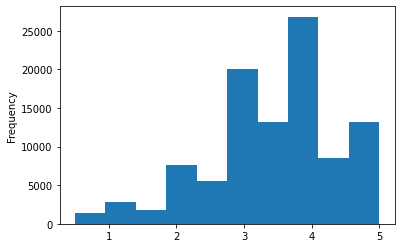

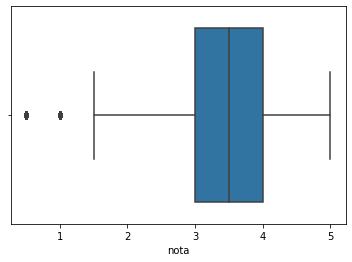

In [ ]:
#------> 1.1 - Dados e Visualizações

notas = pd.read_csv('../dados/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
print(notas.head())
print('\n')

notas.nota.value_counts()

print('Média', notas.nota.mean())
print('Mediana', notas.nota.median())
print('\n')
print(notas.nota.describe())
print('\n')

plt.figure()
notas.nota.plot(kind='hist')

plt.figure()
sns.boxplot(notas.nota)


# 1.2 - Análise Exploratória

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64 

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64 

Nota média para o Toy Story (1995) : 3.9209302325581397


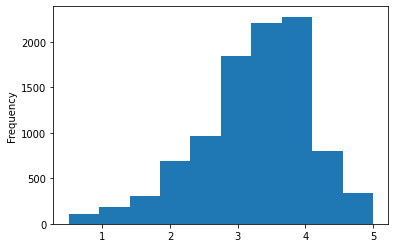

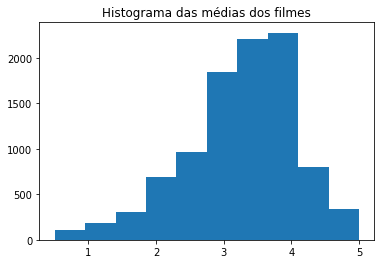

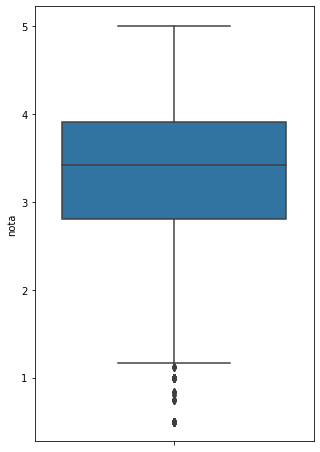

In [ ]:
#------> 1.2 - Análise Exploratória

filmes = pd.read_csv('../dados/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']

nota_media_Id1 = notas.query('filmeId==1').mean().nota
medias_por_filme = notas.groupby('filmeId').mean().nota

print(medias_por_filme.head(), '\n')
print(medias_por_filme.describe(), '\n')
print('Nota média para o', filmes.query('filmeId==1').titulo.item(), ':', float(nota_media_Id1))

plt.figure()
medias_por_filme.plot(kind='hist')

plt.figure()
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)
pass

# 1.3 - Variáveis

In [ ]:
#------> 1.3 - Variáveis

tmdb = pd.read_csv('../dados/tmdb_5000_movies.csv')
print(tmdb.vote_average.unique())

[ 7.2  6.9  6.3  7.6  6.1  5.9  7.4  7.3  5.7  5.4  7.   6.5  6.4  6.2
  7.1  5.8  6.6  7.5  5.5  6.7  6.8  6.   5.1  7.8  5.6  5.2  8.2  7.7
  5.3  8.   4.8  4.9  7.9  8.1  4.7  5.   4.2  4.4  4.1  3.7  3.6  3.
  3.9  4.3  4.5  3.4  4.6  8.3  3.5  4.   2.3  3.2  0.   3.8  2.9  8.5
  1.9  3.1  3.3  2.2  0.5  9.3  8.4  2.7 10.   1.   2.   2.8  9.5  2.6
  2.4]


# 1.4 - Data Visualization

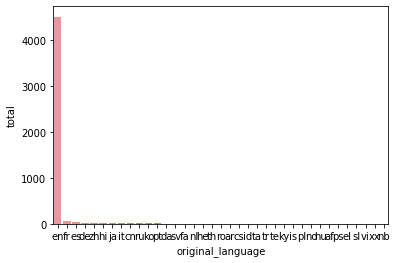

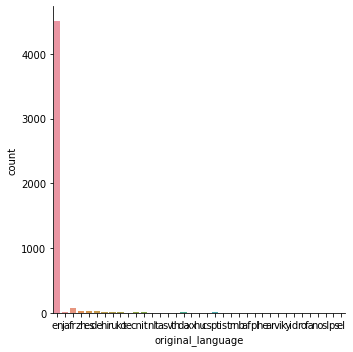

In [ ]:
#------> 1.4 - Data Visualization

contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']

sns.barplot(x='original_language', y='total', data=contagem_de_lingua)
sns.catplot(x='original_language', kind='count', data=tmdb)

pass

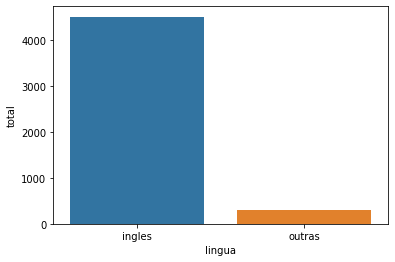

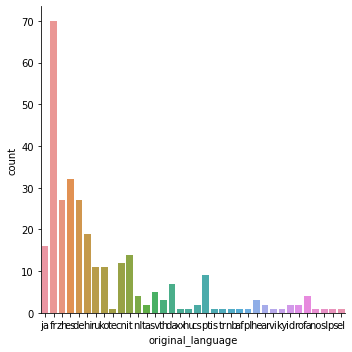

In [ ]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
dados = {
    'lingua': ['ingles', 'outras'],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data=dados)

filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles)

pass

# 1.5 - Continuando com Visualização

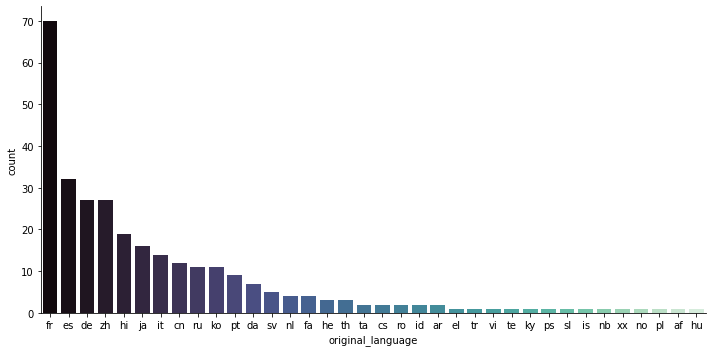

In [ ]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles,
            aspect=2, palette='mako', order=total_por_lingua_de_outros_filmes.index)
pass

#1.6 - Dados e Estatística

   usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247


Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


Nota mediana do Toy Story 4.00
Nota mediana do Toy Story 3.50




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.close>

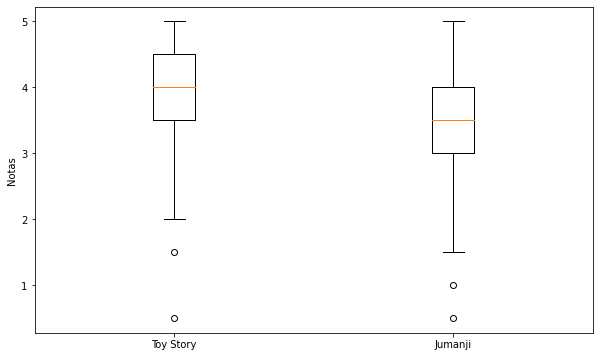

In [ ]:
print(notas.head(2))

notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')

print('\n')
print('Nota média do Toy Story %.2f' % notas_do_toy_story.nota.mean())
print('Nota média do Jumanji %.2f' % notas_do_jumanji.nota.mean())
print('\n')
print('Nota mediana do Toy Story %.2f' % notas_do_toy_story.nota.median())
print('Nota mediana do Toy Story %.2f' % notas_do_jumanji.nota.median())
print('\n')

plt.figure(figsize=(10,6))
plt.boxplot([notas_do_toy_story.nota.to_numpy(), notas_do_jumanji.nota.to_numpy()])
plt.ylabel('Notas')
plt.xticks(ticks=[1, 2], labels=['Toy Story', 'Jumanji'])
plt.close